In [39]:
import pandas as pd
data=pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [40]:
data.shape

(303, 14)

In [41]:
x=pd.DataFrame(data['target'])
x.value_counts()

target
1         165
0         138
Name: count, dtype: int64

C:\Users\SHRUTHI K\AppData\Local\Temp\ipykernel_10368\2067483799.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target',data=data,palette='husl')


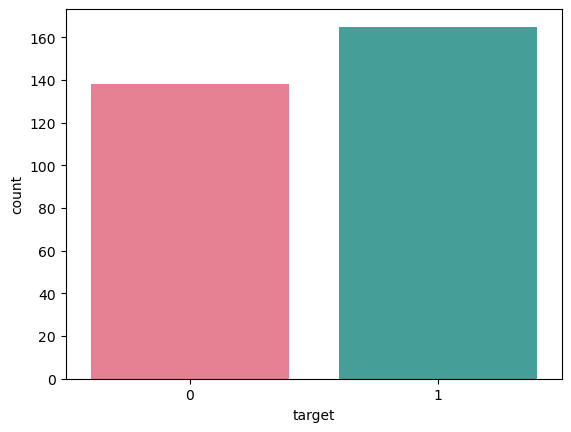

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='target',data=data,palette='husl')
plt.show()

In [43]:
#split data

In [48]:
x=pd.DataFrame(data.iloc[:,:-1])
y=pd.DataFrame(data.iloc[:,-1])
print(x.head())
print(y.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  
   target
0       1
1       1
2       1
3       1
4       1


In [49]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [50]:
#create and trian model

In [51]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

C:\Users\SHRUTHI K\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SHRUTHI K\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
#predicting test set results

In [57]:
y_pred= logmodel.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [58]:
#Accuracy

In [59]:
print("Accuracy",logmodel.score(x_test,y_test))

Accuracy 0.7704918032786885


In [62]:
#Evaluating confusion matrix

In [63]:
from sklearn.metrics import confusion_matrix
c_mat=confusion_matrix(y_test,y_pred)
c_mat

array([[20, 10],
       [ 4, 27]], dtype=int64)

In [64]:
## 20+27(0,1) are correct prediction and 10+4(0,1) are incorrect

In [66]:
##ROC curve - gives true positiv rate and false positive rate. More the line is incline towards top left its indicates good fit model
#roc_auc_score function computes the Area Under the Receiver Operating Characteristic Curve.The ROC AUC score ranges from 0 to 1
#fpr - false +ve rate, Tpr - True +ve rate

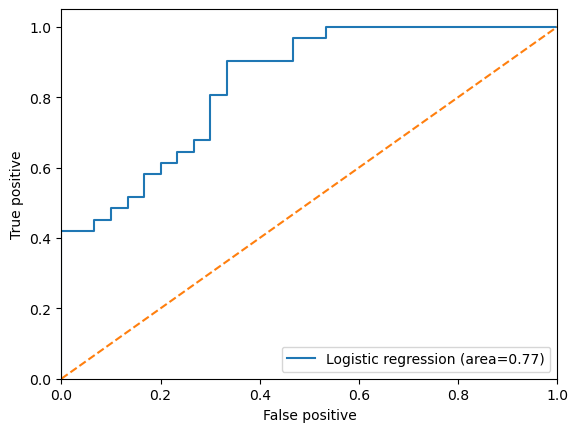

In [90]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc=roc_auc_score(y_test,logmodel.predict(x_test))  #logistics regression area
fpr,tpr,thresholds=roc_curve(y_test,logmodel.predict_proba(x_test)[:,1])
plt.plot(fpr,tpr,label='Logistic regression (area=%0.2f)' %logit_roc_auc)
plt.plot([0,1],[0,1],'--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.05)
plt.xlabel('False positive')
plt.ylabel('True positive')
plt.legend(loc='best')
plt.show()